<a href="https://colab.research.google.com/github/papagorgio23/Northwestern/blob/master/422%20-%20Practical%20Machine%20Learning/Week%201/Discussion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
# set working directory
import os
os.chdir("/content/drive/My Drive/422 - Practical Machine Learning/Colab Notebooks/")
os.getcwd()

'/content/drive/My Drive/422 - Practical Machine Learning/Colab Notebooks'

In [0]:
#Call Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#titanic = pd.read_csv('titanic_data.csv')
url = 'https://raw.githubusercontent.com/cfb2/Machine-Learning/master/train.csv'
titanic = pd.read_csv(url)

In [0]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#view descriptive statistics and first 5 rows
for column in titanic:
    print(titanic[column].describe())
    print(titanic[column].head())

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64
0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64
count                    891
unique                   891
top       Jonkoff, Mr. Lalio
freq                       1
Name: Name, dtype: object
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Flo

In [13]:
#view counts for Survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'Percent of Survivors')

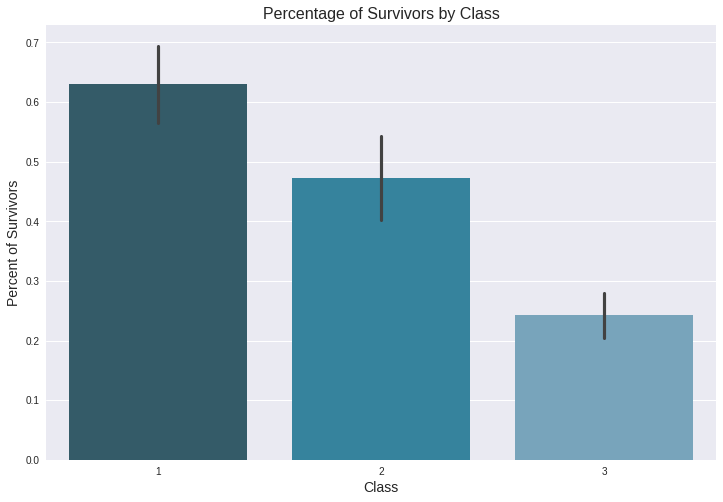

In [0]:
plt.figure(figsize=(12,8))
sns.barplot('Pclass', 'Survived', data=titanic, palette='PuBuGn_d')
plt.title('Percentage of Survivors by Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Percent of Survivors', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'Average Class')

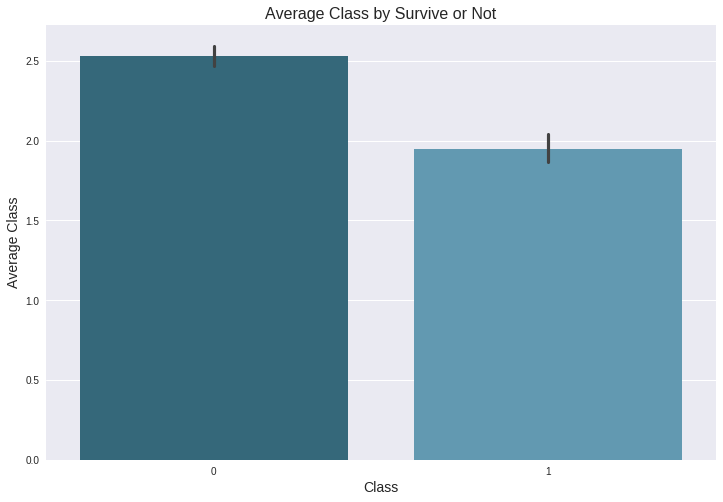

In [13]:
plt.figure(figsize=(12,8))
sns.barplot('Survived', 'Pclass', data=titanic, palette='PuBuGn_d')
plt.title('Average Class by Survive or Not', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Average Class', fontsize=14)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


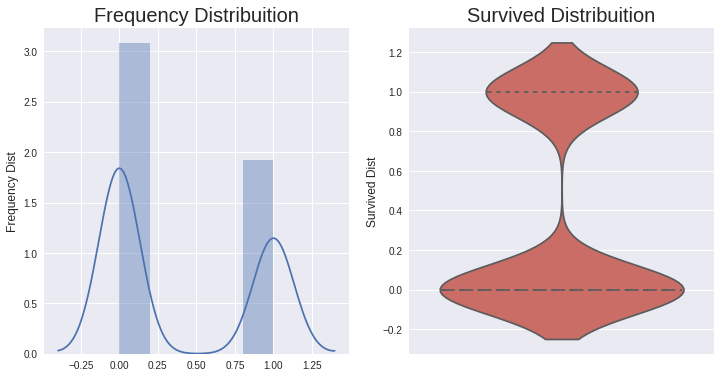

In [17]:
#I will start looking the Survived Distribution
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(titanic["Survived"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="Survived", data=titanic, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Survived Dist", fontsize=12)
g1.set_title("Survived Distribuition", fontsize=20)

plt.show()

In [0]:
print(titanic.Parch.value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [0]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


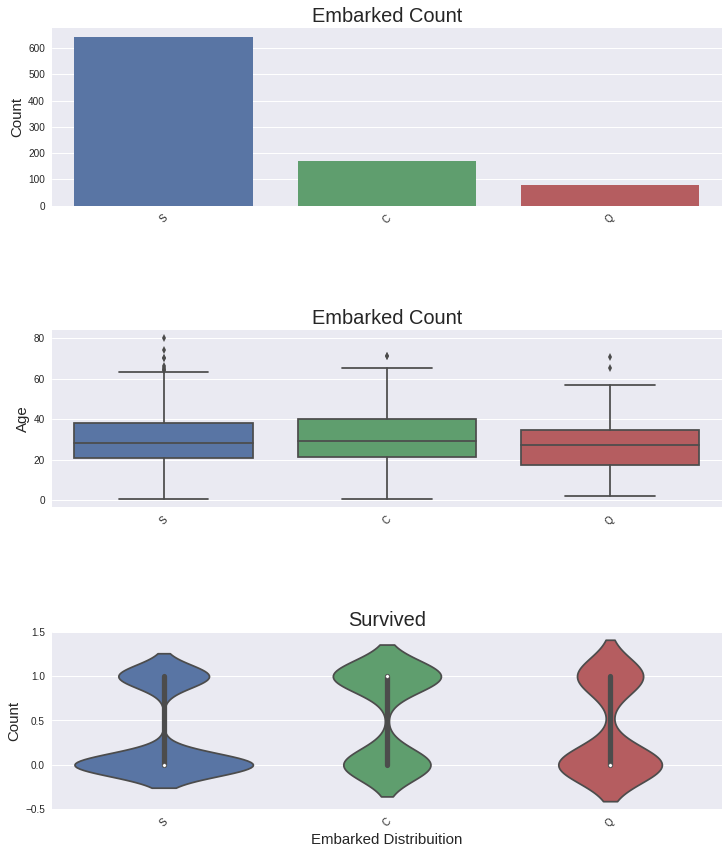

In [0]:
plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="Embarked", data=titanic)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Embarked Count", fontsize=20)

plt.subplot(312)
g1 = sns.boxplot(x="Embarked", y="Age", data=titanic)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Age", fontsize=15)
g1.set_title("Embarked Count", fontsize=20)

plt.subplot(313)
g2 = sns.violinplot(x="Embarked", y="Survived", data=titanic)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Embarked Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Survived", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

In [14]:
#Exploring the counts of catagorical variables
cat_var= ['Parch', 'Embarked', "Sex"]
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(titanic[cat_var[0]], titanic[cat_var[1]]).style.background_gradient(cmap = cm)

Embarked,C,Q,S
Parch,,,
0,123,69,484
1,30,6,82
2,14,1,65
3,1,0,4
4,0,0,4
5,0,1,4
6,0,0,1


In [15]:
pd.crosstab(titanic[cat_var[0]], titanic[cat_var[2]]).style.background_gradient(cmap = cm)

Sex,female,male
Parch,,
0,194,484
1,60,58
2,49,31
3,4,1
4,2,2
5,4,1
6,1,0


In [16]:
pd.crosstab(titanic[cat_var[1]], titanic[cat_var[2]]).style.background_gradient(cmap = cm)

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


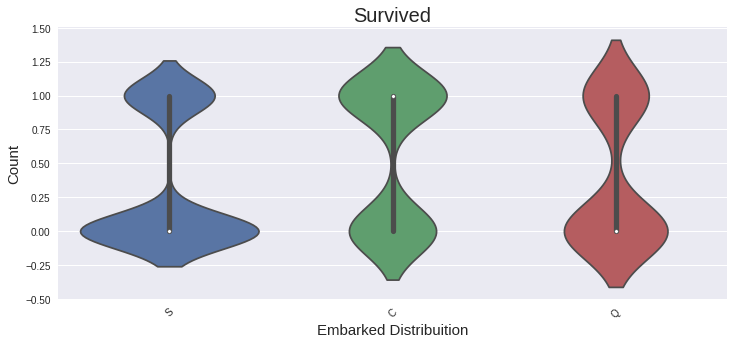

In [20]:
#plt.figure(figsize=(12,8))
#sns.barplot('Survived', 'Pclass', data=titanic, palette='PuBuGn_d')
#plt.title('Average Class by Survive or Not', fontsize=16)
#plt.xlabel('Class', fontsize=14)
#plt.ylabel('Average Class', fontsize=14)


plt.figure(figsize = (12,5))
g2 = sns.violinplot(x="Embarked", y="Survived", data=titanic)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Embarked Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Survived", fontsize=20)

plt.show()

Text(0.5, 0, 'Passenger Count')

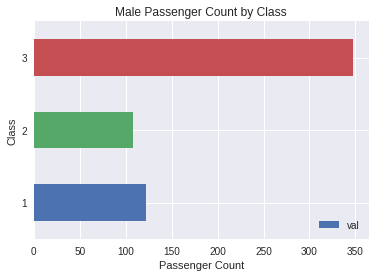

In [5]:
# Horizontal bar charts
df1 = pd.DataFrame({'lab':["1", "2", "3"], 'val':[122, 108, 347]})
ax1 = df1.plot.barh(x='lab', y='val', rot=0)
ax1.set_title('Male Passenger Count by Class')
ax1.set_ylabel('Class')
ax1.set_xlabel('Passenger Count')

Text(0.5, 0, 'Passenger Count')

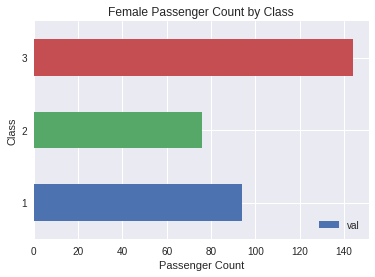

In [6]:
df2 = pd.DataFrame({'lab':["1", "2", "3"], 'val':[94, 76, 144]})
ax2 = df2.plot.barh(x='lab', y='val', rot=0)
ax2.set_title('Female Passenger Count by Class')
ax2.set_ylabel('Class')
ax2.set_xlabel('Passenger Count')

Text(0.5, 0, 'Passenger Count')

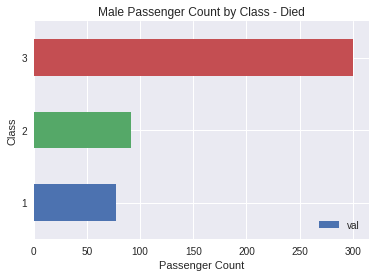

In [7]:
df3 = pd.DataFrame({'lab':["1", "2", "3"], 'val':[77, 91, 300]})
ax3 = df3.plot.barh(x='lab', y='val', rot=0)
ax3.set_title('Male Passenger Count by Class - Died')
ax3.set_ylabel('Class')
ax3.set_xlabel('Passenger Count')

Text(0.5, 0, 'Passenger Count')

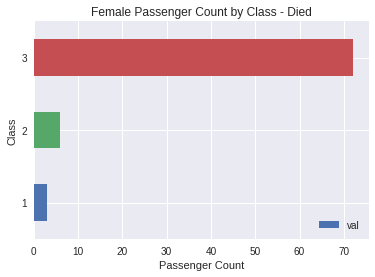

In [8]:
df4 = pd.DataFrame({'lab':["1", "2", "3"], 'val':[3, 6, 72]})
ax4 = df4.plot.barh(x='lab', y='val', rot=0)
ax4.set_title('Female Passenger Count by Class - Died')
ax4.set_ylabel('Class')
ax4.set_xlabel('Passenger Count')

Text(0.5, 0, 'Passenger Age')

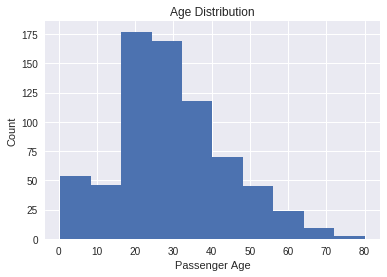

In [9]:
# Histograms
df5 = titanic['Age'].hist()
df5.set_title('Age Distribution')
df5.set_ylabel('Count')
df5.set_xlabel('Passenger Age')

Text(0.5, 0, 'Fare')

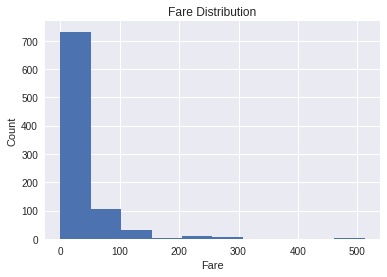

In [10]:
df6 = titanic['Fare'].hist()
df6.set_title('Fare Distribution')
df6.set_ylabel('Count')
df6.set_xlabel('Fare')

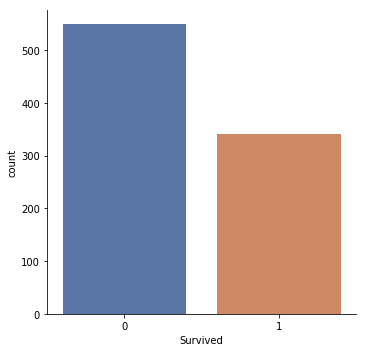

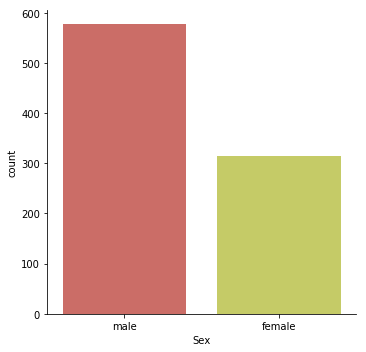

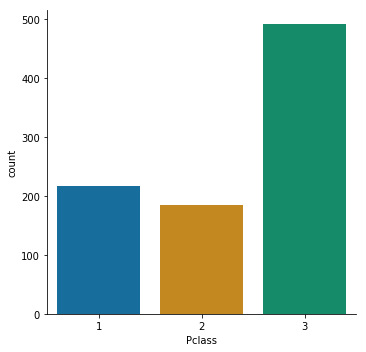

In [5]:
#view barplots for Survived, Pclass and Sex
sns.set_palette('deep')
sns.catplot(x='Survived', kind='count', data=titanic)
sns.set_palette('hls')
sns.catplot(x='Sex', kind='count', data=titanic)
sns.set_palette('colorblind')
sns.catplot(x='Pclass', kind='count', data=titanic)

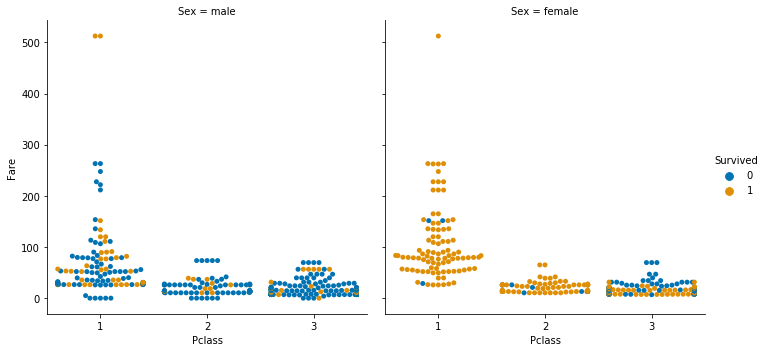

In [7]:
sns.catplot(x="Pclass", y="Fare", hue="Survived", col="Sex", kind='swarm', 
            data=titanic)

Text(0.5, 0, 'Age')

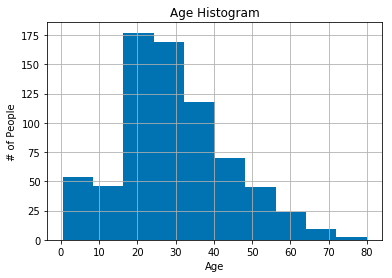

In [8]:
#create histogram of age data to see distribtion
titanic_age_hist = titanic['Age'].hist()
titanic_age_hist.set_title('Age Histogram')
titanic_age_hist.set_ylabel('# of People')
titanic_age_hist.set_xlabel('Age')

Text(0.5, 1.0, 'Age Boxplot')

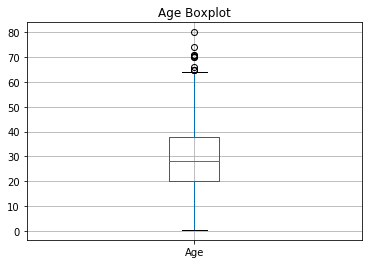

In [9]:
#create age boxplot to look for outliers
titanic_age_boxplot = titanic.boxplot(column = ['Age'])
titanic_age_boxplot.set_title('Age Boxplot')

Text(0.5, 0, 'Fare')

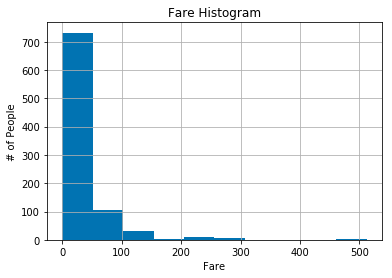

In [10]:
#create histogram of fare data to see distribtion
titanic_fare_hist = titanic['Fare'].hist()
titanic_fare_hist.set_title('Fare Histogram')
titanic_fare_hist.set_ylabel('# of People')
titanic_fare_hist.set_xlabel('Fare')

Text(0.5, 1.0, 'Fare Boxplot')

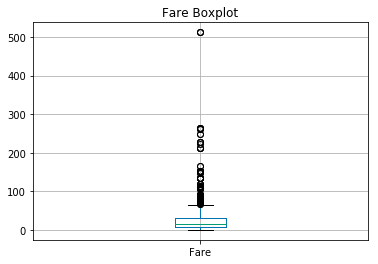

In [11]:
#create fare boxplot to look for outliers
titanic_fare_boxplot = titanic.boxplot(column = ['Fare'])
titanic_fare_boxplot.set_title('Fare Boxplot')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


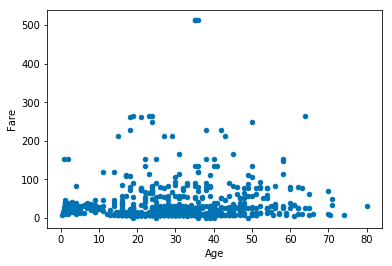

In [12]:
#Is there any relationship between age and fare paid?
titanic.plot.scatter(x = 'Age', y = 'Fare')

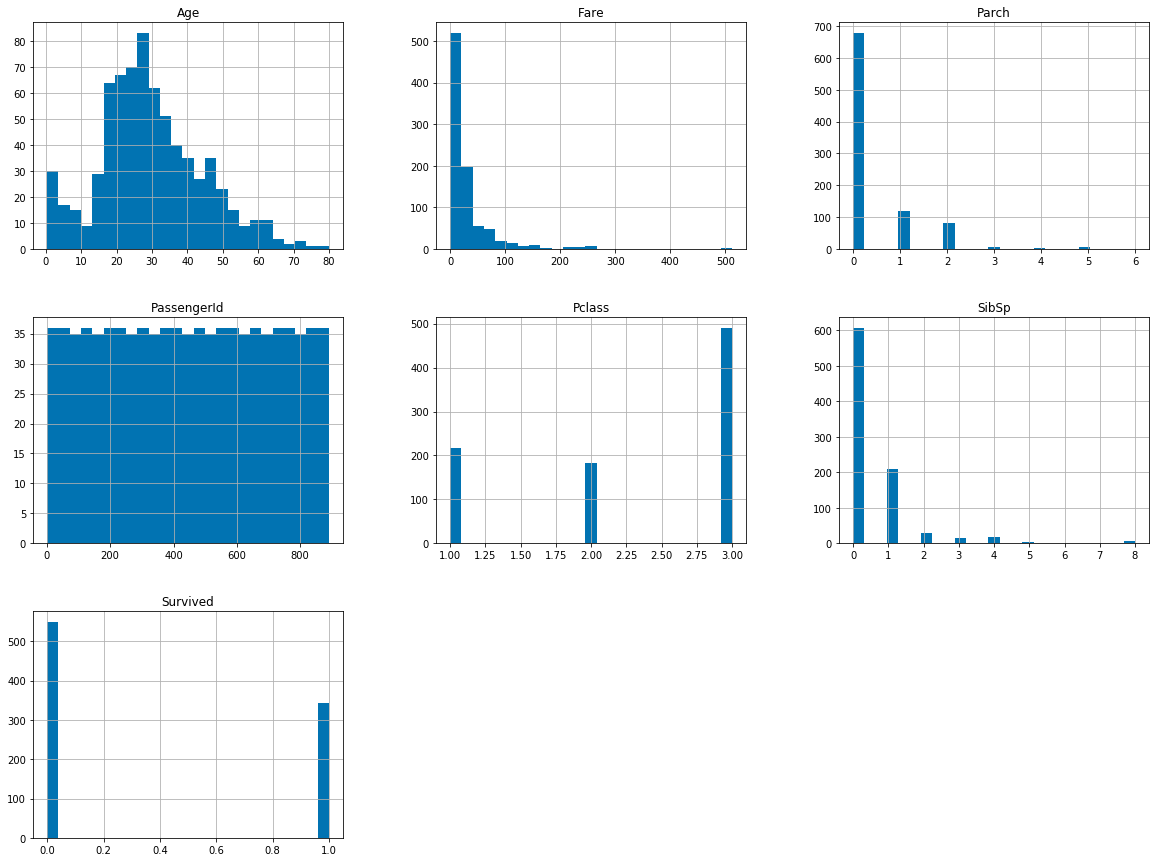

In [13]:
# histograms
titanic.hist(bins=25, figsize=(20,15))
plt.show()

In [15]:
# create groups
g0 = titanic.groupby(["Pclass"]).size()
g0

Pclass
1    216
2    184
3    491
dtype: int64

In [16]:
# create group
g1 = titanic.groupby(["Pclass", "Survived"]).size()
g1

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

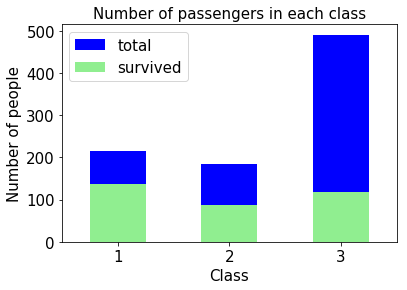

In [17]:
ax = g0.plot(kind='bar', color='blue')
g1.xs(1, level="Survived").plot(kind='bar', color='lightgreen')
plt.title('Number of passengers in each class', size=15)  # plot title
plt.xlabel('Class', size=15)  # lable for x axis
plt.xticks(fontsize=15, rotation=0)
plt.ylabel('Number of people', size=15) # lable for y axis 
plt.yticks(fontsize=15)
ax.legend(("total", "survived"), fontsize=15)
plt.show()

In [18]:
# more groups
g2=titanic.groupby(["Sex"])["Survived"].count()
g2

Sex
female    314
male      577
Name: Survived, dtype: int64

In [19]:
g3=titanic.groupby(["Sex","Survived"])["Survived"].count()
g3

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

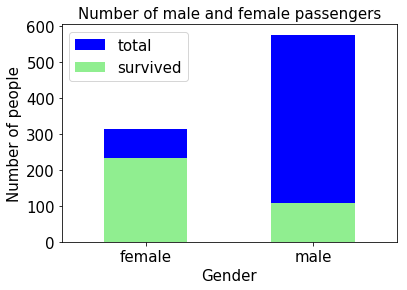

In [20]:
ax=g2.plot(kind="bar", color="blue")
g3.xs(1, level="Survived").plot(kind="bar", color="lightgreen", ax=ax)

plt.title('Number of male and female passengers', size=15)  # plot title
plt.xlabel('Gender', size=15)  # lable for x axis
plt.xticks(fontsize=15, rotation=0)
plt.ylabel('Number of people', size=15) # lable for y axis 
plt.yticks(fontsize=15)
ax.legend(("total", "survived"), fontsize=15)
plt.show()

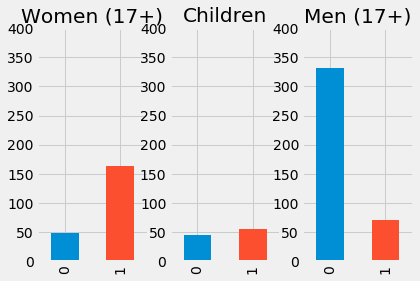

In [21]:
### 538 style
# group by age and gender
kids = titanic[(titanic.Age < 17)]
adults = titanic[(titanic.Age >= 17)]

with plt.style.context('fivethirtyeight'):
  plt.subplot(1, 3, 1)
  adults[(adults.Sex == 'female')].Survived.value_counts(sort = False).plot.bar(title = 'Women (17+)', ylim = (0,400));
  plt.subplot(1, 3, 2)
  kids.Survived.value_counts(sort = False).plot.bar(title = 'Children',ylim = (0,400));
  plt.subplot(1, 3, 3)
  adults[(adults.Sex == 'male')].Survived.value_counts(sort = False).plot.bar(title = 'Men (17+)', ylim = (0,400));

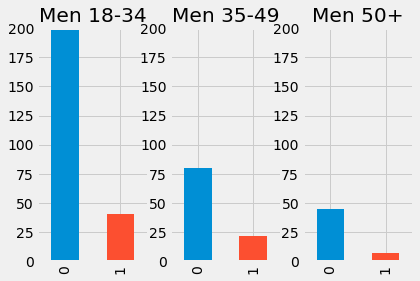

In [24]:
plt.subplot(1, 3, 1)
titanic[(titanic.Sex == 'male') & (titanic.Age > 17) & (titanic.Age <35)].Survived.value_counts(sort = False).plot.bar(title = 'Men 18-34', ylim = (0,200));

plt.subplot(1, 3, 2)
titanic[(titanic.Sex == 'male') & (titanic.Age >= 35) & (titanic.Age < 50)].Survived.value_counts(sort = False).plot.bar(title = 'Men 35-49', ylim = (0,200));

plt.subplot(1, 3, 3)
titanic[(titanic.Sex == 'male') & (titanic.Age >= 50)].Survived.value_counts(sort = False).plot.bar(title = 'Men 50+', ylim = (0,200));

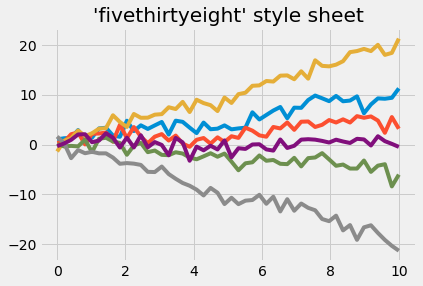

In [22]:
## random side note about 538
# https://matplotlib.org/gallery/style_sheets/fivethirtyeight.html
# https://matplotlib.org/users/style_sheets.html

import matplotlib.pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

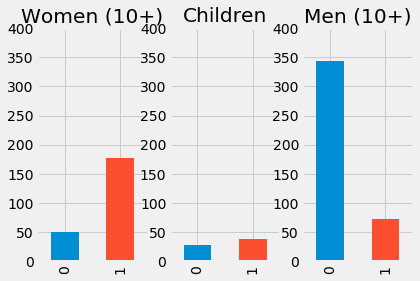

In [32]:
### 538 style
# group by age and gender
kids = titanic[(titanic.Age < 12)]
adults = titanic[(titanic.Age >= 12)]

with plt.style.context('fivethirtyeight'):
  plt.subplot(1, 3, 1)
  adults[(adults.Sex == 'female')].Survived.value_counts(sort = False).plot.bar(title = 'Women (10+)', ylim = (0,400));
  plt.subplot(1, 3, 2)
  kids.Survived.value_counts(sort = False).plot.bar(title = 'Children',ylim = (0,400));
  plt.subplot(1, 3, 3)
  adults[(adults.Sex == 'male')].Survived.value_counts(sort = False).plot.bar(title = 'Men (10+)', ylim = (0,400));

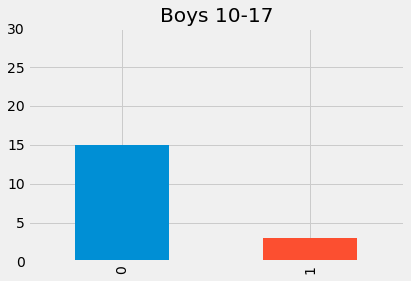

In [31]:
plt.subplot(1,1,1)
titanic[(titanic.Sex == 'male') & (titanic.Age > 10) & (titanic.Age <17)].Survived.value_counts(sort = False).plot.bar(title = 'Boys 10-17', ylim = (0,30));
